In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
TEAMS= ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"]
WESTERN_CONF_TEAMS = ["DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC", "PHO", "POR", "SAC", "SAS", "UTA"]
EASTERN_CONF_TEAMS = ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DET", "IND", "MIA", "MIL", "NYK", "ORL", "PHI", "TOR", "WAS"]
ATLANTIC_DIV_TEAMS = ["BOS", "BRK", "NYK", "PHI", "TOR"]
CENTRAL_DIV_TEAMS = ["CHI", "CLE", "DET", "IND", "MIL"]
SOUTHEAST_DIV_TEAMS = ["ATL", "CHO", "MIA", "ORL", "WAS"]
NORTHWEST_DIV_TEAMS = ["DEN", "MIN", "OKC", "POR", "UTA"]
SOUTHWEST_DIV_TEAM = ["GSW", "LAC", "LAL", "PHO", "SAC"]
PACIFIC_DIV_TEAMS = ["DAL", "HOU", "MEM", "NOP", "SAS"]
SEASONS = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [3]:
def mean(data):
    return sum(data) / len(data)

In [4]:
def variance(data):
    n = len(data)
    avg = mean(data)
    
    deviations = [(x - avg) ** 2 for x in data]
    
    variance = sum(deviations) / n
    return variance

In [5]:
def std(data):
    var = variance(data)
    std = var ** 0.5
    return std

In [6]:
def growth_rate(data):
    straight_line_growth = []
    
    for i in range(1, len(data)):
        growth = (data[i] - data[i-1]) / data[i-1]
        straight_line_growth.append(growth)
        
    growth_rt = sum(straight_line_growth) / len(straight_line_growth)
    
    return "{:.2f}%".format(growth_rt*100)

In [7]:
def format_season(season):
        #Formats years in season to use in File Name
        #Ex: 2021 turns into 2020-21
        first_year = season-1
        second_year = str(season)[2:]
        
        return first_year, second_year

In [8]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [9]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [10]:
avg_off_ratings = []
avg_def_ratings = []

for i in range(len(SEASONS)):
    off_ratings = adv_team_dfs[i]["ORtg"]
    def_ratings = adv_team_dfs[i]["DRtg"]
    
    avg_off_ratings.append(mean(off_ratings))
    avg_def_ratings.append(mean(def_ratings))
    
print(avg_off_ratings)
print(avg_def_ratings)

[103.02758620689654, 104.51379310344826, 103.63448275862069, 102.91034482758621, 106.06666666666663, 106.21333333333332, 106.43999999999998, 107.48, 108.26333333333334, 107.57666666666664, 107.25666666666665, 104.59000000000002, 105.83666666666666, 106.64999999999999, 105.64000000000003, 106.3933333333333, 108.80999999999997, 108.61666666666666, 110.40000000000002, 110.49999999999999, 112.35333333333332]
[103.01379310344831, 104.53103448275861, 103.62413793103448, 102.8896551724138, 106.07333333333332, 106.2, 106.43333333333335, 107.46666666666667, 108.22666666666666, 107.55333333333333, 107.22666666666666, 104.6, 105.8433333333333, 106.64333333333333, 105.64999999999999, 106.39333333333333, 108.77999999999999, 108.60666666666664, 110.40333333333332, 110.68000000000002, 112.33000000000001]


In [11]:
adv_team_dfs[1]

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Arena,Attend.,Attend./G,Made_Playoffs
0,SAC,27.0,61.0,21.0,61,21,7.61,0.00,7.61,109.0,...,27.9,0.231,0.467,13.6,71.7,0.185,ARCO Arena (II),709997,17317,True
1,LAL,27.9,58.0,24.0,60,22,7.12,0.03,7.15,109.4,...,28.8,0.218,0.453,13.0,72.0,0.233,STAPLES Center,778777,18995,True
2,SAS,28.5,58.0,24.0,59,23,6.21,0.07,6.28,106.5,...,27.2,0.262,0.453,13.7,71.9,0.189,Alamodome,906390,22107,True
3,BRK,26.1,52.0,30.0,53,29,4.16,-0.49,3.67,104.0,...,29.2,0.206,0.459,14.9,71.6,0.213,Continental Airlines Arena,564194,13761,True
4,DAL,27.6,57.0,25.0,53,29,4.26,0.16,4.41,112.2,...,26.1,0.232,0.485,12.9,70.7,0.239,American Airlines Center,802783,19580,True
5,MIN,26.7,50.0,32.0,51,31,3.38,0.20,3.58,109.0,...,31.3,0.203,0.482,12.7,73.7,0.218,Target Center,731673,17846,True
6,POR,29.0,49.0,33.0,50,32,2.99,0.22,3.21,107.4,...,31.8,0.218,0.489,14.2,73.3,0.202,Rose Garden Arena,797821,19459,True
7,OKC,26.9,45.0,37.0,50,32,3.02,0.22,3.24,108.9,...,29.4,0.189,0.485,14.5,68.1,0.206,KeyArena at Seattle Center,633516,15452,True
8,BOS,26.2,49.0,33.0,48,34,2.21,-0.46,1.75,103.4,...,24.1,0.223,0.464,15.1,72.9,0.245,FleetCenter,659751,16091,True
9,DET,29.5,50.0,32.0,48,34,2.13,-0.45,1.69,104.8,...,24.4,0.235,0.474,14.8,70.5,0.206,The Palace of Auburn Hills,760807,18556,True


In [18]:
diffs_rtg = []
avg_off_rtgs_playoffs = []
avg_def_rtgs_playoffs = []
avg_off_rtgs_non_playoffs = []
avg_def_rtgs_non_playoffs = []

for i in range(len(SEASONS)):
    off_rating_playoff_teams = []
    def_rating_playoff_teams = []
    off_rating_non_playoff_teams = []
    def_rating_non_playoff_teams = []
    for index, row in adv_team_dfs[i].iterrows():
        if row["Made_Playoffs"] == True:
            off_rating_playoff_teams.append(row["ORtg"])
            def_rating_playoff_teams.append(row["DRtg"])
        elif row["Made_Playoffs"] == False:
            off_rating_non_playoff_teams.append(row["ORtg"])
            def_rating_non_playoff_teams.append(row["DRtg"])
            
    avg_playoff_o = mean(off_rating_playoff_teams)
    avg_playoff_d = mean(def_rating_playoff_teams)
    
    avg_off_rtgs_playoffs.append(avg_playoff_o)
    avg_def_rtgs_playoffs.append(avg_playoff_d)
    
    avg_non_playoff_o = mean(off_rating_non_playoff_teams)
    avg_non_playoff_d = mean(def_rating_non_playoff_teams)
    
    avg_off_rtgs_non_playoffs.append(avg_non_playoff_o)
    avg_def_rtgs_non_playoffs.append(avg_non_playoff_d)
    
    ortg_diff = avg_playoff_o - avg_off_ratings[i]
    drtg_diff = avg_playoff_d - avg_def_ratings[i]

    diffs_rtg.append((ortg_diff, drtg_diff))
  
print(diffs_rtg)

[(1.653663793103462, -1.8700431034483103), (1.754956896551704, -1.5060344827586363), (1.7905172413793196, -1.3991379310345025), (1.277155172413785, -1.7396551724137908), (1.1208333333333798, -1.8858333333333377), (1.1429166666666788, -1.987499999999983), (1.3725000000000165, -1.6333333333333826), (2.4137500000000074, -2.0416666666666714), (1.4991666666666674, -2.1891666666666794), (1.5795833333333604, -2.4220833333333474), (1.562083333333348, -2.1641666666666737), (1.559999999999988, -2.2125000000000057), (1.7508333333333326, -1.8745833333333053), (1.4187500000000028, -2.0120833333333508), (2.1787499999999937, -1.2499999999999716), (1.8629166666666777, -1.7120833333333394), (1.7087500000000375, -1.1550000000000153), (1.7958333333333343, -1.4004166666666578), (1.768749999999983, -1.7408333333333275), (1.58750000000002, -1.8925000000000267), (2.3966666666666754, -1.0175000000000125)]


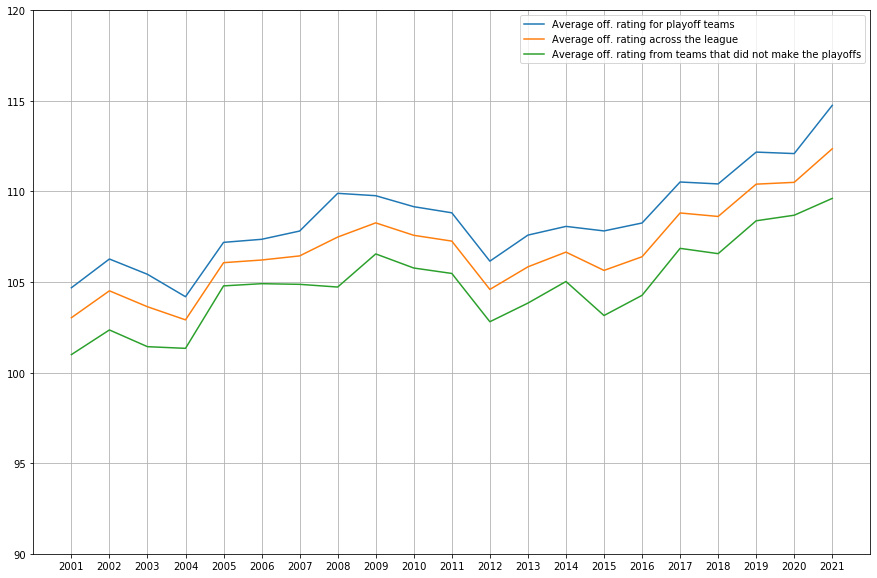

In [19]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_off_rtgs_playoffs, label='Average off. rating for playoff teams')
plt.plot(SEASONS, avg_off_ratings, label='Average off. rating across the league')
plt.plot(SEASONS, avg_off_rtgs_non_playoffs, label='Average off. rating from teams that did not make the playoffs')
plt.xticks(SEASONS)
plt.yticks([90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0])
plt.legend()
plt.show()

In [14]:
growth_rate(avg_off_ratings)

'0.44%'

In [15]:
growth_rate([o for o, _ in diffs_rtg])

'4.99%'

In [16]:
growth_rate([d for _, d in diffs_rtg])

'-0.26%'

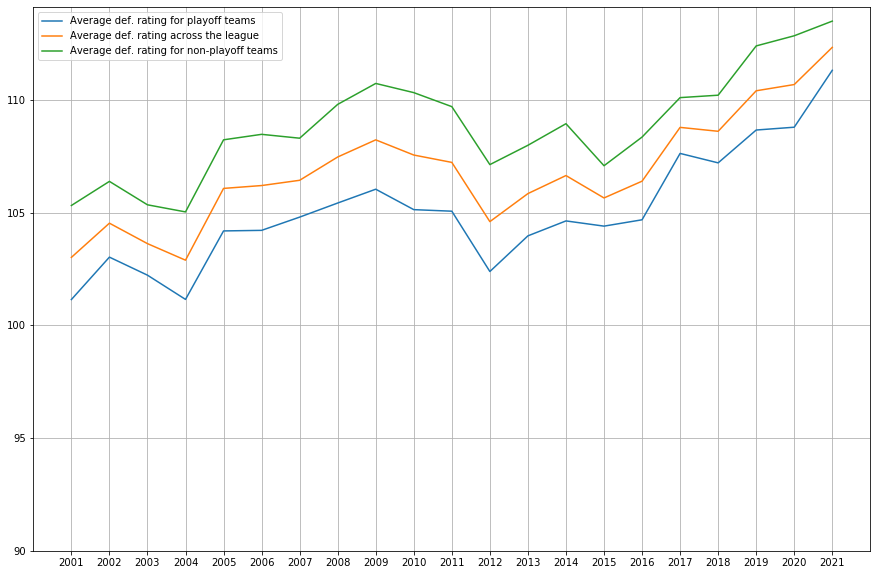

In [20]:
plt.figure(figsize=(15,10))


plt.grid()
plt.plot(SEASONS, avg_def_rtgs_playoffs, label='Average def. rating for playoff teams')
plt.plot(SEASONS, avg_def_ratings, label='Average def. rating across the league')
plt.plot(SEASONS, avg_def_rtgs_non_playoffs, label='Average def. rating for non-playoff teams')
plt.xticks(SEASONS)
plt.yticks([90.0, 95.0, 100.0, 105.0, 110.0])
plt.legend()
plt.show()

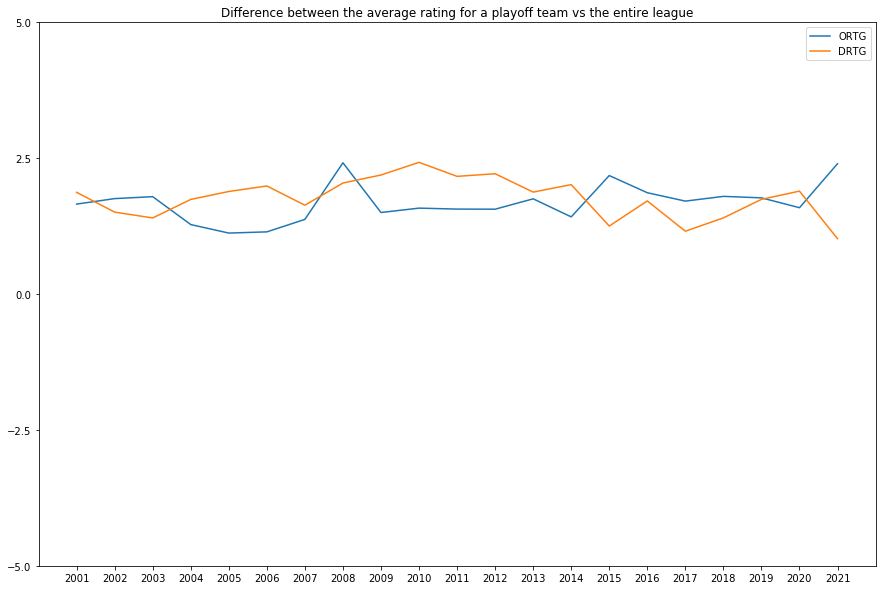

In [18]:
plt.figure(figsize=(15,10))


plt.plot(SEASONS, [o for o, _ in diffs_rtg], label='ORTG')
plt.plot(SEASONS, [-d for _, d in diffs_rtg], label='DRTG')
plt.title("Difference between the average rating for a playoff team vs the entire league")
plt.xticks(SEASONS)
plt.yticks([-5.0, -2.5, 0.0, 2.5, 5.0])
plt.legend()
plt.show()